#### importing all requried dependencies

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [186]:
df = pd.read_csv("Mall_Customers.csv")

In [187]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [188]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [189]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [191]:
df.shape

(200, 5)

In [192]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [193]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [194]:
label = LabelEncoder()

In [195]:
df['Genre'] = label.fit_transform(df['Genre'])

- 1--> Male
- 0--> Female

In [196]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


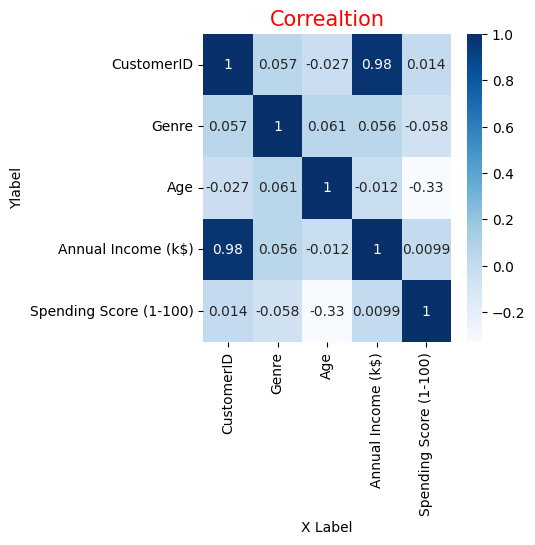

In [197]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True,cmap="Blues",cbar=True)
"""
Where,
cmap == it is the color which is the heatmap want to be
in cmap we had diffeent types of color's like --> Blues,Purple,Coolwarm,Virids,plasma
cbar == the bar which is on the right side of the heatmap is called the cbar

"""
plt.title("Correaltion",fontsize=15,color="red")
plt.xlabel("X Label")
plt.ylabel("Ylabel")
plt.show()

In [198]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [199]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [200]:
# we had no y values because it is a unsupervised learning

In [201]:
scaler = StandardScaler()

In [202]:
x_scaler = scaler.fit_transform(x)

In [203]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
# Elbow Method
# What is Elbow Method?
# The method is used to find the optimal number of cluster in KMenas algorithm

In [ ]:
wcss = [] 
# WCSS == Within Cluster Sum of Squares
for k in range(1,6):
    kmeans = KMeans(
        n_clusters=k,
        init = "k-means++",
        random_state=43
    )
    kmeans.fit(x_scaler)
    wcss.append(kmeans.inertia_)

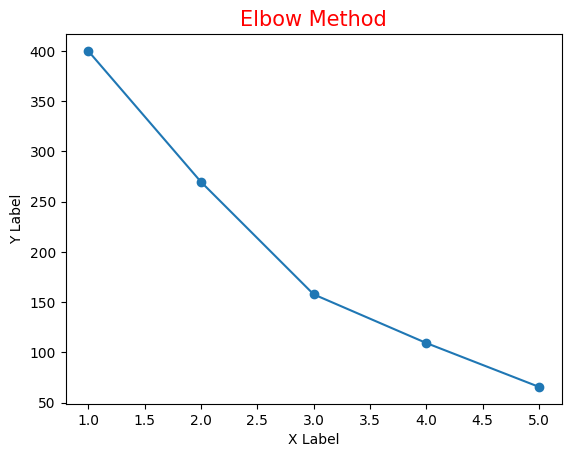

In [214]:
plt.plot(range(1,6),wcss,marker="o")
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.title("Elbow Method",fontsize=15,color="red")
plt.show()

In [ ]:
model = KMeans(
    n_clusters = 5,
    init = "k-means++",
    random_state=43)

In [ ]:
y_kmeans = kmeans.fit_predict(x_scaler)

In [ ]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 5, 0, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1,
       1, 1, 1, 8, 1, 8, 8, 1, 1, 1, 8, 1, 8, 1, 1, 1, 1, 8, 1, 8, 8, 1,
       1, 1, 8, 8, 1, 1, 8, 1, 8, 1, 1, 8, 1, 4, 8, 4, 8, 4, 2, 4, 2, 4,
       8, 4, 2, 4, 2, 4, 2, 4, 2, 4, 8, 4, 2, 4, 8, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 8, 4, 2, 4, 2, 4, 2, 7, 2, 4, 2, 4, 2, 7, 2, 7,
       2, 4, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 9, 6, 9, 6, 9, 6,
       9, 6], dtype=int32)

In [ ]:
df["Cluster"] = y_kmeans

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,0
2,3,0,20,16,6,3
3,4,0,23,16,77,0
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,6
196,197,0,45,126,28,9
197,198,1,32,126,74,6
198,199,1,32,137,18,9


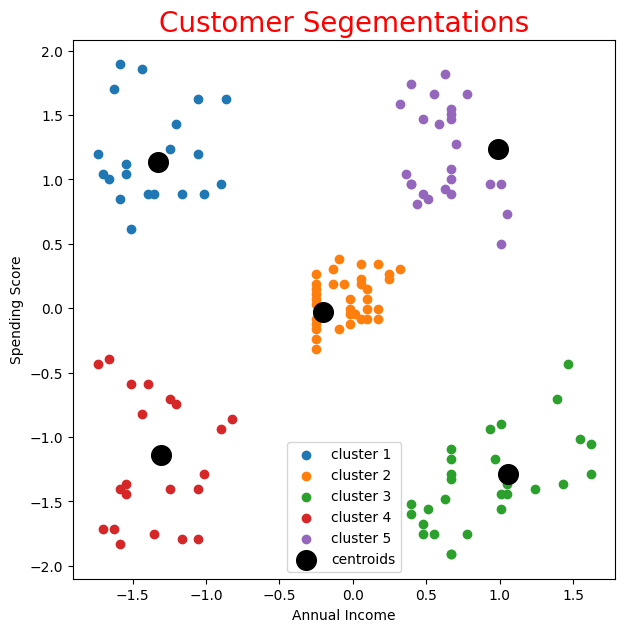

In [185]:
plt.figure(figsize=(7,7))
plt.scatter(x_scaler[y_kmeans==0,0],x_scaler[y_kmeans==0,1],label="cluster 1")
plt.scatter(x_scaler[y_kmeans==1,0],x_scaler[y_kmeans==1,1],label="cluster 2")
plt.scatter(x_scaler[y_kmeans==2,0],x_scaler[y_kmeans==2,1],label="cluster 3")
plt.scatter(x_scaler[y_kmeans==3,0],x_scaler[y_kmeans==3,1],label="cluster 4")
plt.scatter(x_scaler[y_kmeans==4,0],x_scaler[y_kmeans==4,1],label= "cluster 5")
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200,
    c="black",
    label="centroids"
)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segementations",fontsize=20,color="red")
plt.legend()
plt.show()

In [209]:
new_data = [[113,99]]
new_data_scaler = scaler.transform(new_data)
new_data_scaler

C:\Users\srinivas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[2.00160487, 1.89449216]])

In [210]:
preddiction = kmeans.predict(new_data_scaler)

In [211]:
preddiction

array([3], dtype=int32)

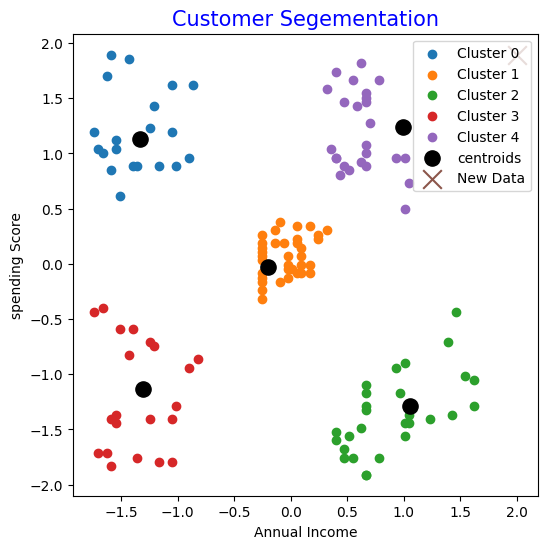

In [212]:
plt.figure(figsize=(6,6))
for i in range(5):
    plt.scatter(
        x_scaler[y_kmeans==i,0],
        x_scaler[y_kmeans==i,1],
        label=f"Cluster {i}"
    )
plt.scatter(
      kmeans.cluster_centers_[:,0],
      kmeans.cluster_centers_[:,1],
      s=120,
      c="black",
      label="centroids"
    )
plt.scatter(
      new_data_scaler[0,0],
      new_data_scaler[0,1],
      s=180,
      marker="x",
      label="New Data"
    )
plt.xlabel("Annual Income")
plt.ylabel("spending Score")
plt.title("Customer Segementation",fontsize=15,color="blue")
plt.legend()    
plt.show()

In [213]:
print(len(kmeans.cluster_centers_))

5
